In [3]:
# price = y
# sqlf_living = X

### House EDA
#### Linear regression
##### **Name:** Lesly Jimenez Burriola
#### Import libraries

In [4]:
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# Linear Regression
from sklearn.linear_model import LinearRegression

# Sample split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Model Evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Import Dataset

In [5]:
df = pd.read_csv("house_prices.csv")

#### Data inspection

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

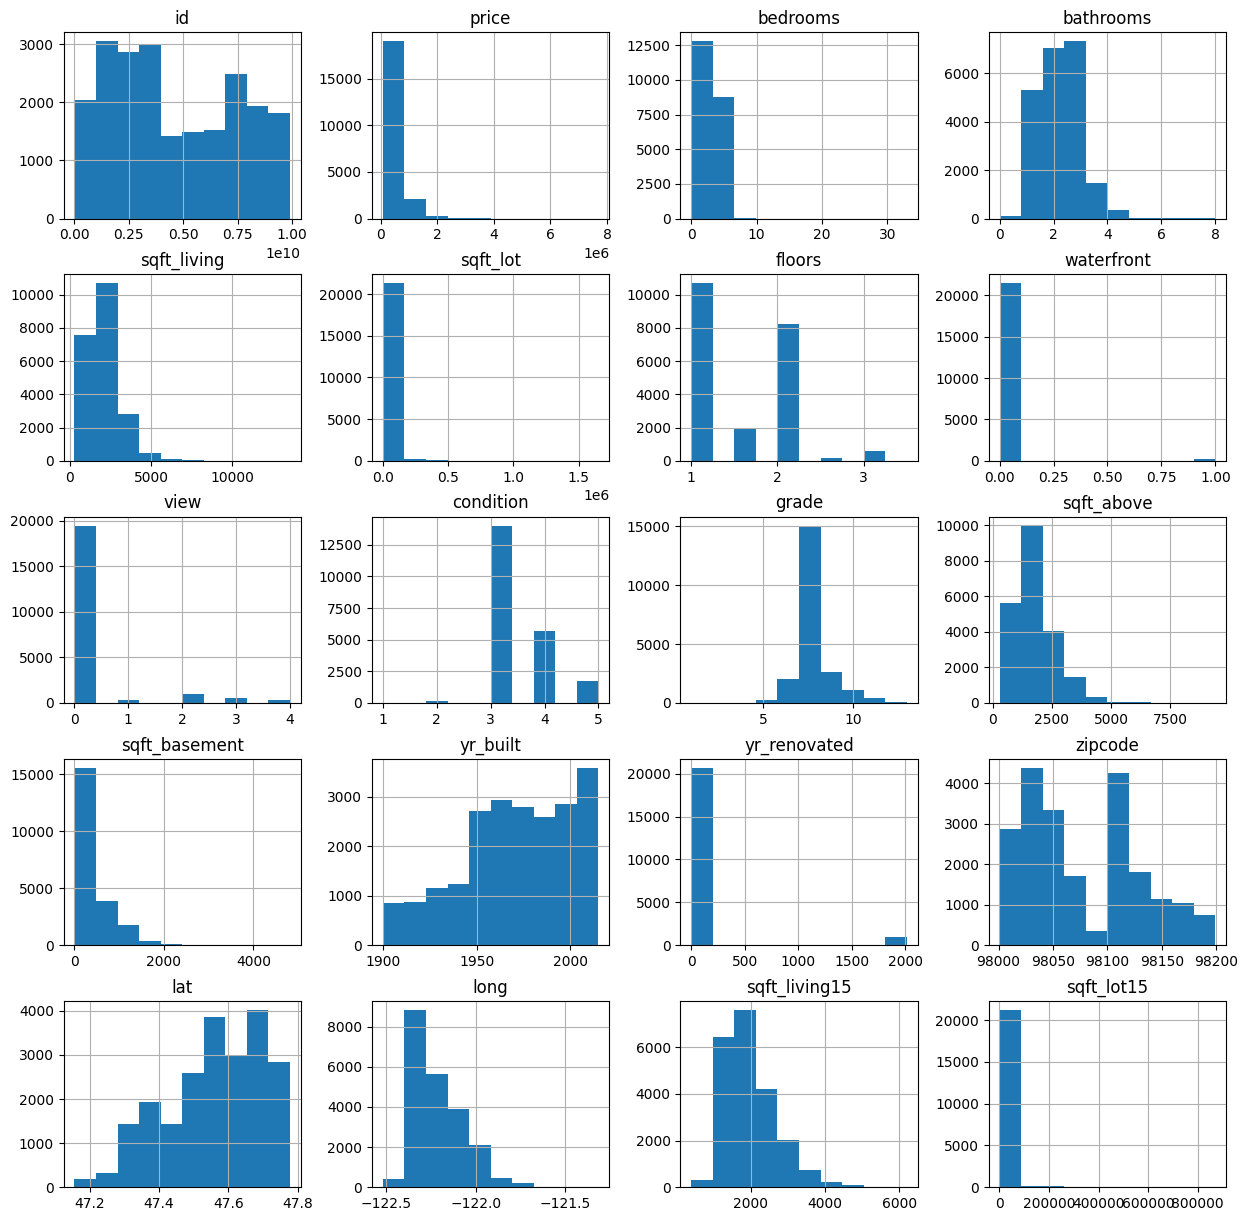

In [9]:
df.hist(figsize=(15, 15))

### EDA

#### What is the house with the highest price?

In [10]:
df.loc[df["price"].idxmax()]

id                    6762700020
date             20141013T000000
price                  7700000.0
bedrooms                       6
bathrooms                    8.0
sqft_living                12050
sqft_lot                   27600
floors                       2.5
waterfront                     0
view                           3
condition                      4
grade                         13
sqft_above                  8570
sqft_basement               3480
yr_built                    1910
yr_renovated                1987
zipcode                    98102
lat                      47.6298
long                    -122.323
sqft_living15               3940
sqft_lot15                  8800
Name: 7252, dtype: object

##### Show the house with the lowest price

In [11]:
df.loc[df["price"].idxmin()]

id                    3421079032
date             20150217T000000
price                    75000.0
bedrooms                       1
bathrooms                    0.0
sqft_living                  670
sqft_lot                   43377
floors                       1.0
waterfront                     0
view                           0
condition                      3
grade                          3
sqft_above                   670
sqft_basement                  0
yr_built                    1966
yr_renovated                   0
zipcode                    98022
lat                      47.2638
long                    -121.906
sqft_living15               1160
sqft_lot15                 42882
Name: 1149, dtype: object

##### Top 10 houses more expensives and how much bedrooms they have

In [12]:
filtered_df = df[["bedrooms", "price"]]
filtered_df.sort_values(by="price", ascending=False).head(10)

,bedrooms,price
7252,6,7700000.0
3914,5,7062500.0
9254,6,6885000.0
4411,5,5570000.0
1448,5,5350000.0
1315,6,5300000.0
1164,5,5110800.0
8092,5,4668000.0
2626,5,4500000.0
8638,4,4489000.0


##### Bedrooms by price (20 first values)

In [23]:
bedroom_by_class = df.groupby("price")["bedrooms"].mean().head(20)
bedroom_by_class

price
75000.0     1.000000
78000.0     2.000000
80000.0     1.000000
81000.0     2.000000
82000.0     3.000000
82500.0     2.000000
83000.0     2.000000
84000.0     2.000000
85000.0     2.000000
86500.0     3.000000
89000.0     3.000000
89950.0     1.000000
90000.0     1.800000
92000.0     2.000000
95000.0     1.750000
96500.0     3.000000
99000.0     2.000000
100000.0    2.333333
102500.0    2.000000
104950.0    2.000000
Name: bedrooms, dtype: float64

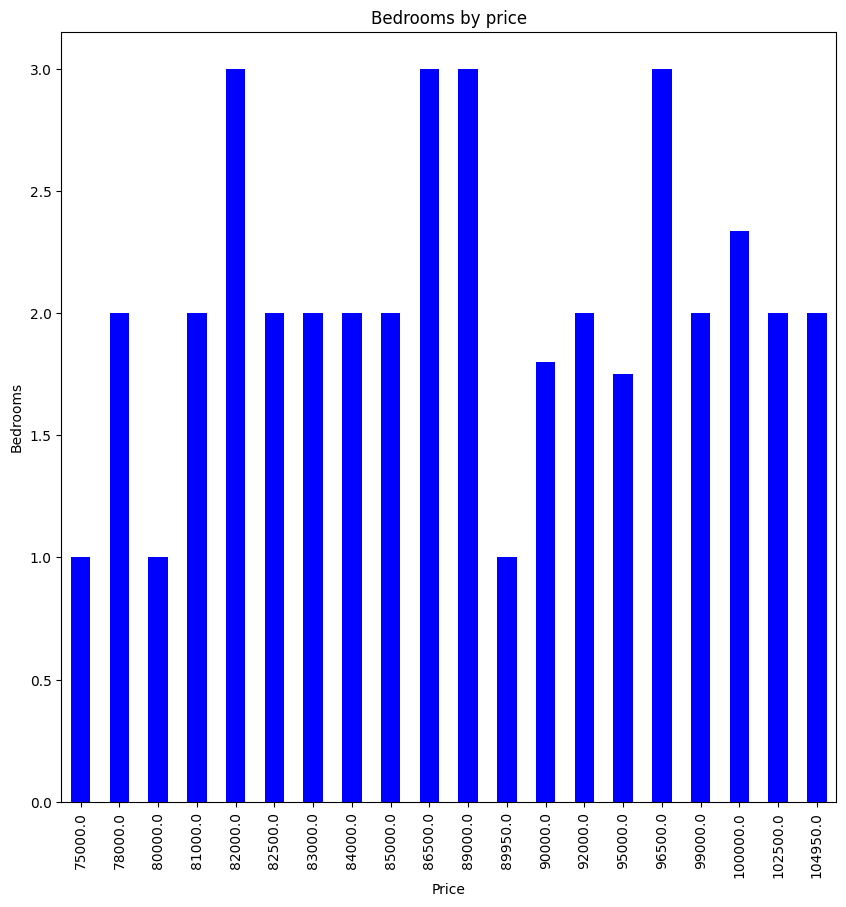

In [24]:
bedroom_by_class.plot(kind="bar", color="blue", figsize=(10, 10))
plt.title("Bedrooms by price")
plt.ylabel("Bedrooms")
plt.xlabel("Price")
plt.xticks(rotation=90)
plt.show()

##### General Distribution of Housing Prices

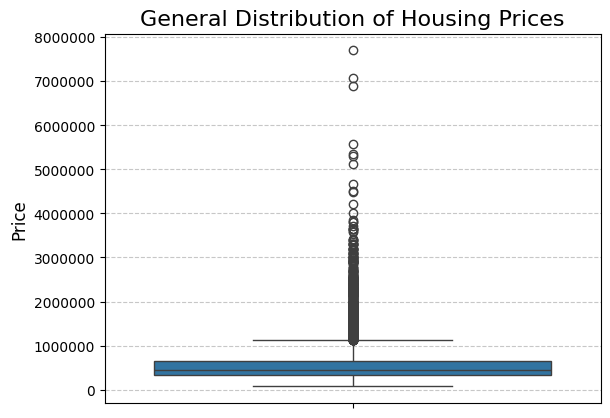

In [ ]:
sns.boxplot(y=df['price'])
plt.title("General Distribution of Housing Prices", fontsize=16)
plt.ylabel("Price", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

##### Bedrooms, bathrooms and floors afect the price

In [27]:
corr = df[["price", "bedrooms", "bathrooms", "floors"]].corr()

<Axes: >

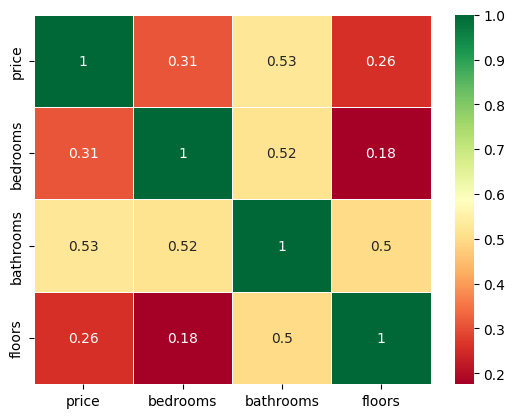

In [28]:
sns.heatmap(corr, annot=True, cmap="RdYlGn", linewidths=0.5)

##### Distribution of housing prices for each different number of floors

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_21660\664964253.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df, x="floors", y="price", palette="Set1")


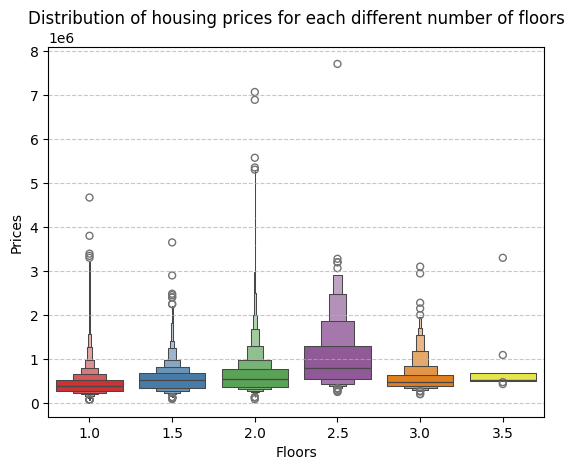

In [33]:
sns.boxenplot(data=df, x="floors", y="price", palette="Set1")
plt.title("Distribution of housing prices for each different number of floors")
plt.xlabel("Floors")
plt.ylabel("Prices")
plt.grid(axis='y', linestyle='--', alpha=0.7)

##### Living area by number of floors

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_21660\1059861398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='floors', y='sqft_living', data=df, palette='viridis')


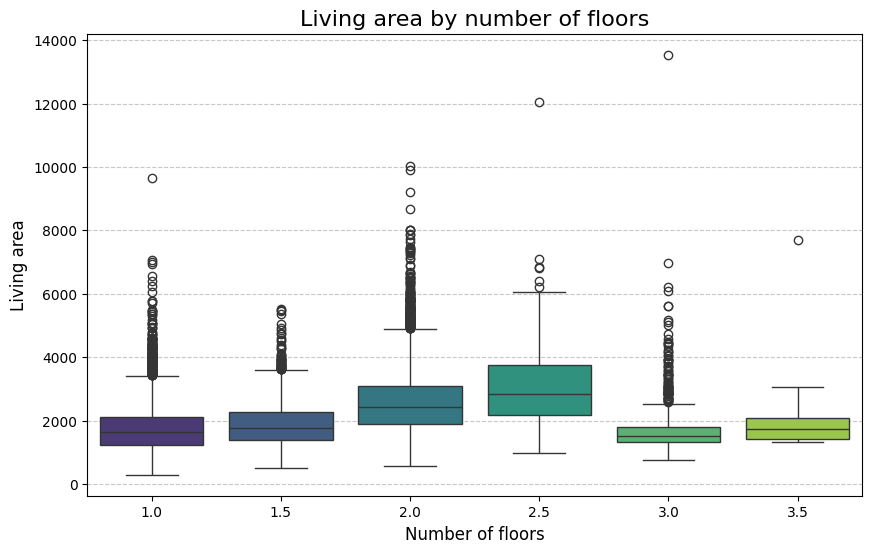

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='floors', y='sqft_living', data=df, palette='viridis')

plt.title("Living area by number of floors", fontsize=16)
plt.xlabel("Number of floors", fontsize=12)
plt.ylabel("Living area", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ticklabel_format(style='plain', axis='y') # Evita notación científica si los números son grandes
plt.show()

##### Price vs. Living area by quality grade

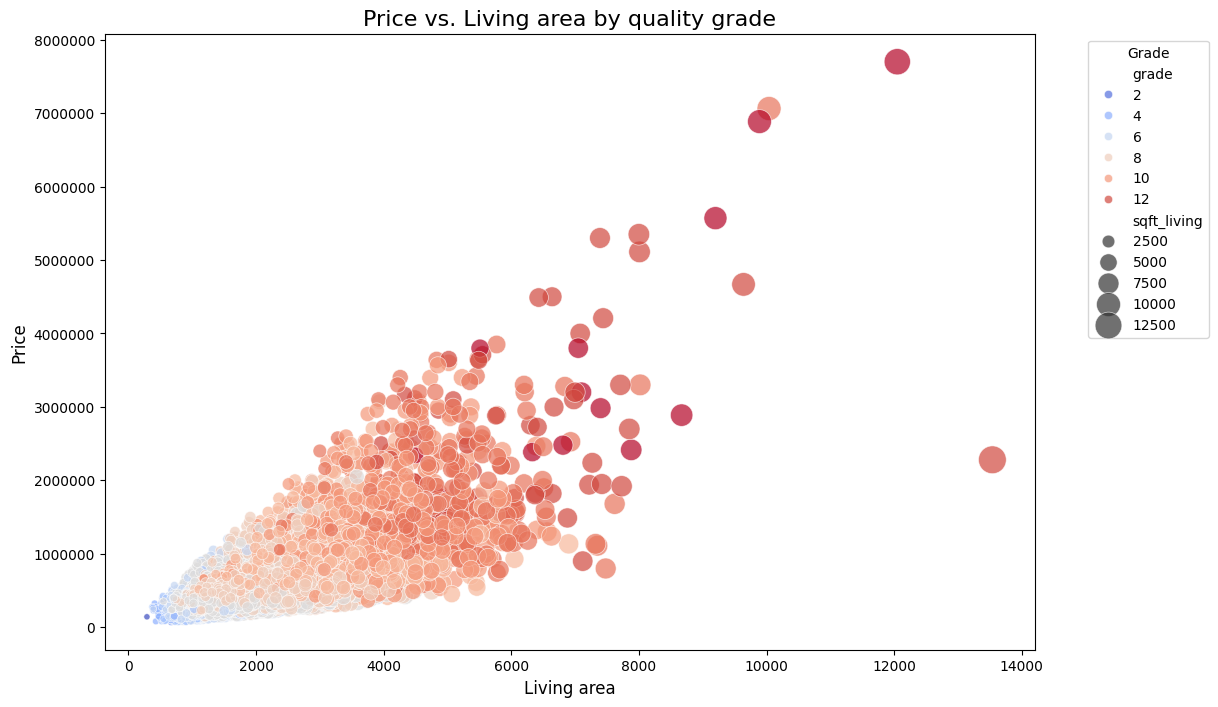

In [37]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sqft_living', y='price', hue='grade', size='sqft_living', sizes=(20, 400),
                data=df, alpha=0.7, palette='coolwarm')
plt.title("Price vs. Living area by quality grade", fontsize=16)
plt.xlabel("Living area", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.ticklabel_format(style='plain', axis='x')
plt.ticklabel_format(style='plain', axis='y')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

##### Price Distribution in the 10 Most Expensive Postal Codes

C:\Users\Jmnzb\AppData\Local\Temp\ipykernel_21660\2896613680.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='zipcode', y='price', data=df_top_zipcodes, palette='RdYlGn', order=top_zipcodes)


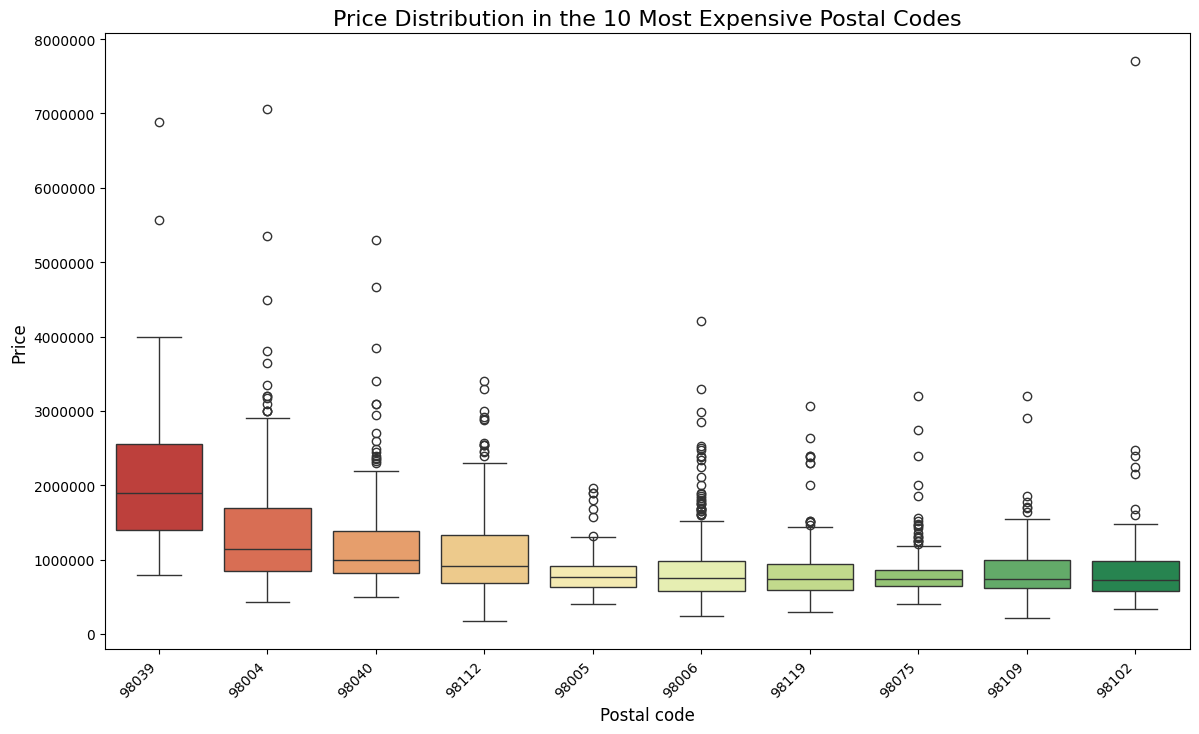

In [39]:
top_zipcodes = df.groupby('zipcode')['price'].median().nlargest(10).index
df_top_zipcodes = df[df['zipcode'].isin(top_zipcodes)]
plt.figure(figsize=(14, 8))
sns.boxplot(x='zipcode', y='price', data=df_top_zipcodes, palette='RdYlGn', order=top_zipcodes)
plt.title("Price Distribution in the 10 Most Expensive Postal Codes", fontsize=16)
plt.xlabel("Postal code", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45, ha='right')
plt.show()

### Linear Regression

#### Building the model

##### Separating predictor and target

In [ ]:
X = df[["price"]]
y = df[["sqft_living"]]

##### Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3)

In [ ]:
y_train.shape

(15129, 1)

In [ ]:
X_train.shape

(15129, 1)

In [ ]:
X_test.shape

(6484, 1)

In [ ]:
y_test.shape

(6484, 1)

##### Train model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


##### Evaluate the model with training data

In [ ]:
y_pred = model.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train, y_pred) 
r2 = r2_score(y_train, y_pred)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  425274.42530432367
R2:  0.49846278080593054


##### Evaluate the model with test data

In [ ]:
y_pred_test = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred_test) 
r2 = r2_score(y_test, y_pred_test)
print("MSE: ", mse)
print("R2: ", r2)

MSE:  433619.40338108165
R2:  0.4795221496715514


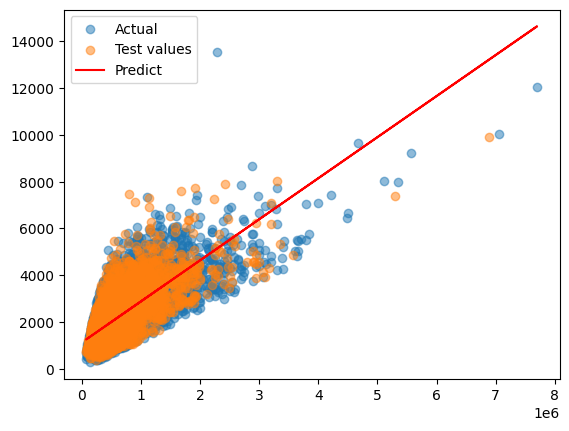

In [ ]:
plt.scatter(X_train, y_train, alpha=0.5, label="Actual")
plt.scatter(X_test, y_test, label="Test values", alpha=0.5)
plt.plot(X_train, y_pred, color="Red", label="Predict")
plt.legend()
plt.show()